In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files into DataFrames
drivers_df = pd.read_csv('Data_Generated/drivers.csv')
trucks_df = pd.read_csv('Data_Generated/trucks.csv')
deliveries_df = pd.read_csv('Data_Generated/deliveries.csv')
expenses_df = pd.read_csv('Data_Generated/expenses.csv')

# Display basic information about each DataFrame
print("Drivers DataFrame:")
print(drivers_df.info())

print("\nTrucks DataFrame:")
print(trucks_df.info())

print("\nDeliveries DataFrame:")
print(deliveries_df.info())

print("\nExpenses DataFrame:")
print(expenses_df.info())

Drivers DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       1000 non-null   object
 1   working_h  1000 non-null   int64 
 2   salary     1000 non-null   int64 
 3   overtime   1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None

Trucks DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   truck_number             1000 non-null   int64
 1   cargo_hold_capacity      1000 non-null   int64
 2   total_distance_traveled  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Deliveries DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non

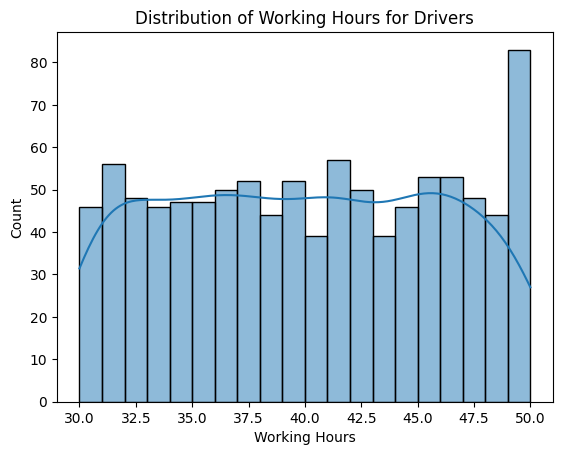

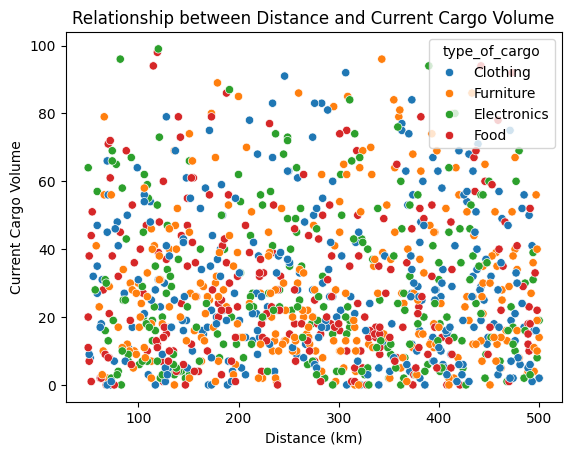

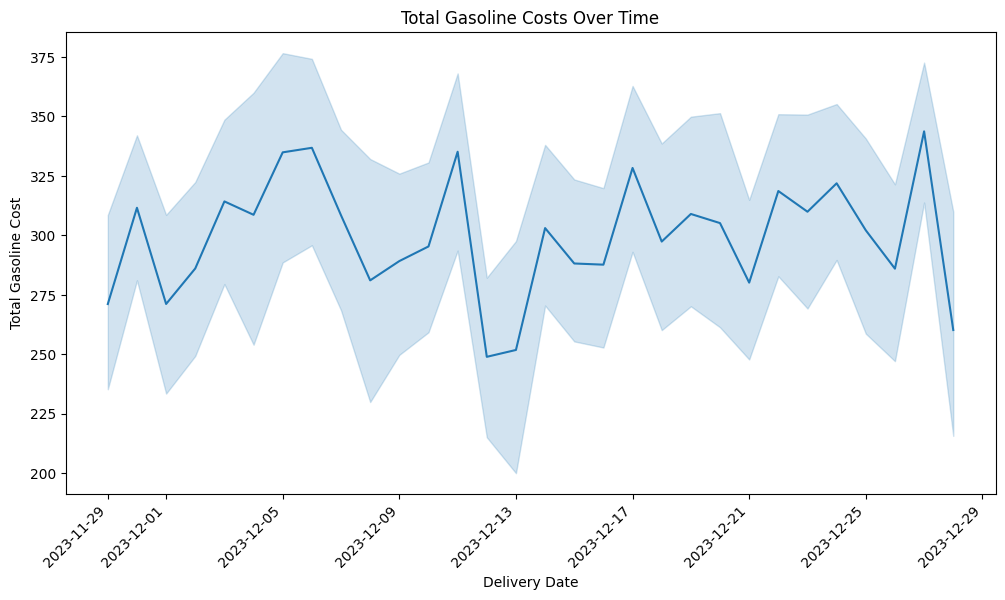

In [16]:
# Analyze individual tables
# For example, let's visualize the distribution of working hours for drivers
sns.histplot(drivers_df['working_h'], bins=20, kde=True)
plt.title('Distribution of Working Hours for Drivers')
plt.xlabel('Working Hours')
plt.ylabel('Count')
plt.show()

# Visualize relationships, e.g., distance vs. cargo volume
sns.scatterplot(data=deliveries_df, x='distance_in_km', y='current_cargo_volume', hue='type_of_cargo')
plt.title('Relationship between Distance and Current Cargo Volume')
plt.xlabel('Distance (km)')
plt.ylabel('Current Cargo Volume')
plt.show()

# Assuming 'delivery_date' is a column in deliveries_df
deliveries_df['delivery_date'] = pd.to_datetime(deliveries_df['delivery_date'])

# Merge deliveries with expenses on 'driver_name'
merged_df = pd.merge(deliveries_df, expenses_df, on='driver_name', how='inner')

# Plot total gasoline costs over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivery_date', y='gasoline_cost', data=merged_df)
plt.title('Total Gasoline Costs Over Time')
plt.xlabel('Delivery Date')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.ylabel('Total Gasoline Cost')
plt.show()


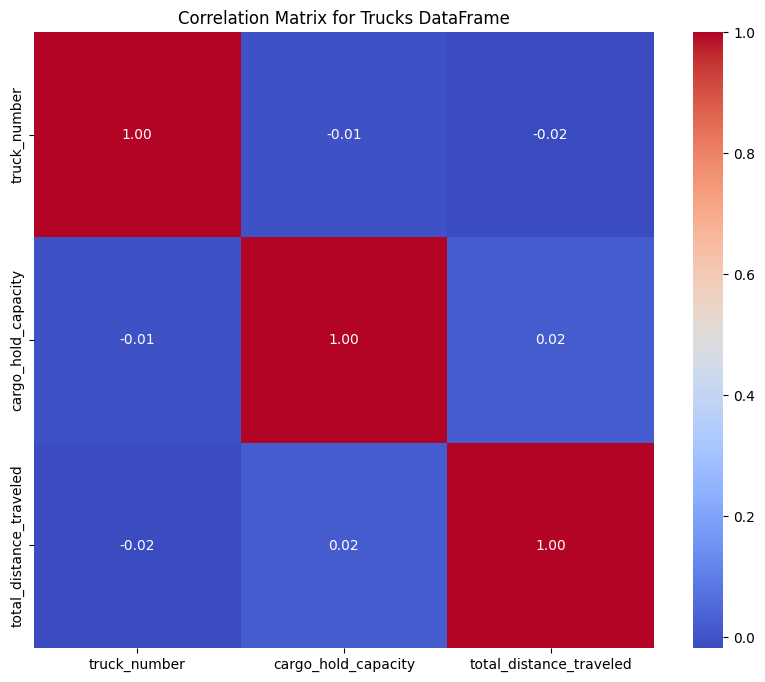

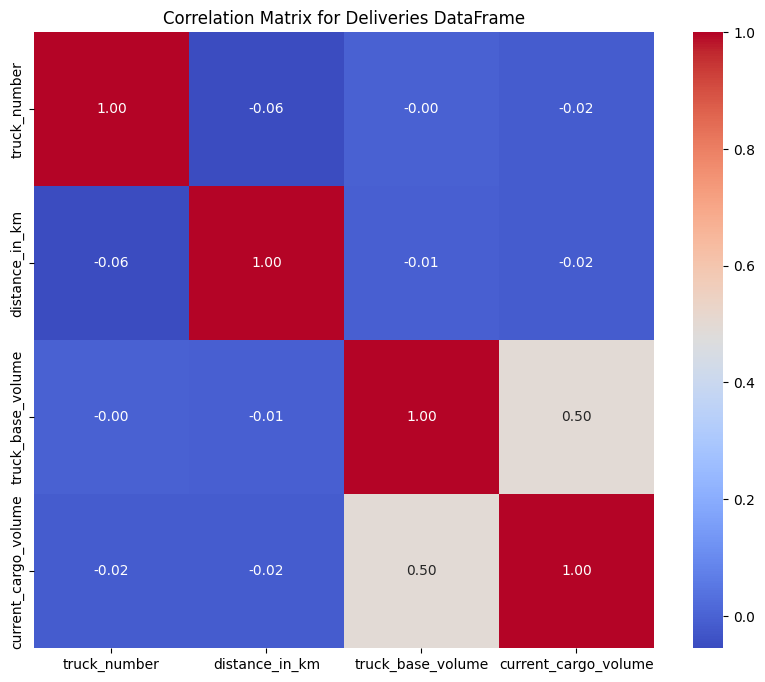

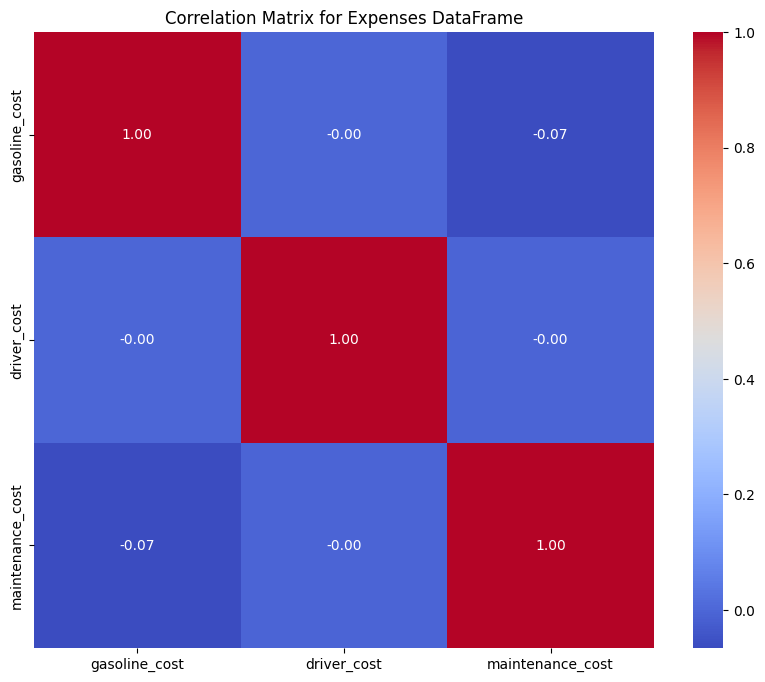

In [23]:
# Identify variables for correlation analysis in trucks_df
numeric_columns_trucks = trucks_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_trucks = trucks_df[numeric_columns_trucks].corr()

# Visualize the correlation matrix using a heatmap for trucks_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_trucks, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Trucks DataFrame')
plt.show()

# Identify variables for correlation analysis in deliveries_df
numeric_columns_deliveries = deliveries_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_deliveries = deliveries_df[numeric_columns_deliveries].corr()

# Visualize the correlation matrix using a heatmap for deliveries_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_deliveries, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Deliveries DataFrame')
plt.show()

# Identify variables for correlation analysis in expenses_df
numeric_columns_expenses = expenses_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_expenses = expenses_df[numeric_columns_expenses].corr()

# Visualize the correlation matrix using a heatmap for expenses_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_expenses, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Expenses DataFrame')
plt.show()

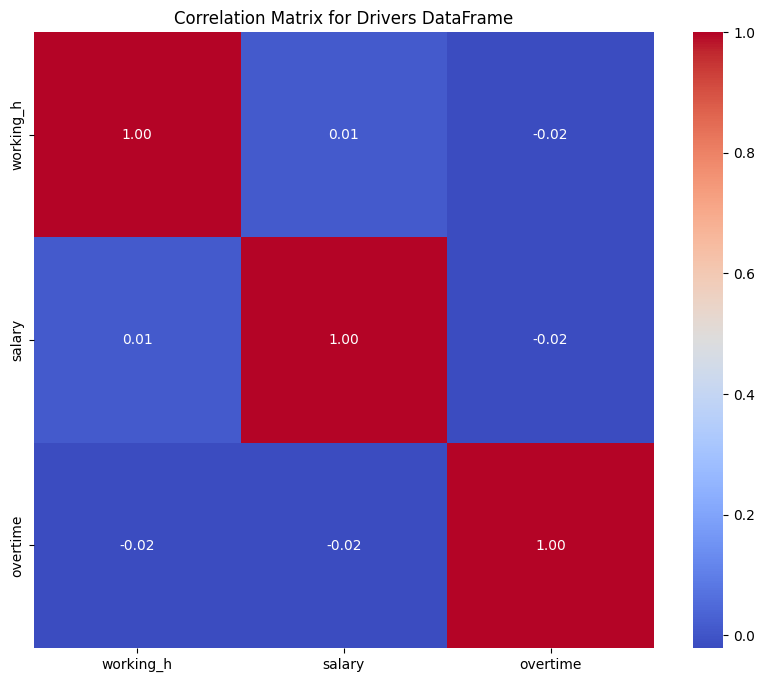